In [1]:
import sys
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import operator

%matplotlib inline

### Question 1 (a)

In [2]:
np.random.seed(123)

In [3]:
m_train = pd.read_csv("train.csv")
m_test = pd.read_csv("test.csv")

In [4]:
Y_train = m_train["label"].values
len(Y_train)

42000

In [5]:
X_train = m_train.drop(labels = ["label"],axis = 1).values
len(X_train)

42000

### Question 1 (b)

In [6]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

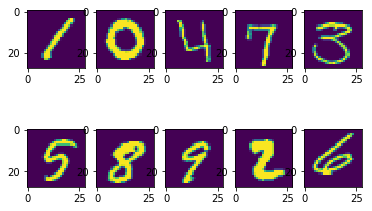

In [7]:
sample_values = m_train.drop_duplicates('label').values
fig = plt.figure()
for i in range(sample_values.shape[0]):
    fig.add_subplot(2, 5, i+1)
    plt.imshow(np.array(sample_values[i][1:], dtype='float').reshape((28,28)))

### Question 1 (c)

Prior probability is :
[0.09838095 0.11152381 0.09945238 0.10359524 0.09695238 0.09035714
 0.0985     0.10478571 0.0967381  0.09971429]


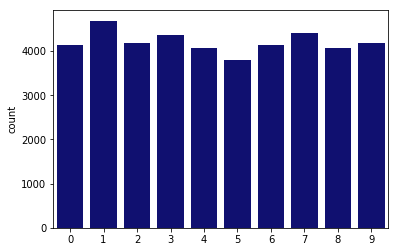

In [8]:
g = sns.countplot(Y_train, color = "navy")
num_of_bins = np.bincount(m_train['label'])
Prior_probability = num_of_bins/np.sum(num_of_bins)
print("Prior probability is :")
print(Prior_probability)

### Question 1 (d)

There are erroneous in the matches of 3 and 5.

In [9]:
def nearest_norm(v1, v2):    
    result = [(k, np.sqrt(np.sum((v1-v2[k])**2))) for k in range(len(v2))]
    srt = sorted(result, key=lambda x: x[1])
    return srt

In [10]:
digit_i = []
pair = []
distance = []
for i in range(10):
    digit_i.append(list(Y_train).index(i))
for a in digit_i:
    interm = nearest_norm(X_train[a], X_train)[1]
    pair.append(interm[0])
    distance.append(interm[1])

Best match L2 is 1046.5954328201515 which is between 0 and 0
Best match L2 is 489.67948701165744 which is between 1 and 1
Best match L2 is 1380.877257398354 which is between 2 and 2
*Best match L2 is 1832.6649993929605 which is between 3 and 5
Best match L2 is 1356.8809822530493 which is between 4 and 4
Best match L2 is 1066.3676664265472 which is between 5 and 5
Best match L2 is 1446.5113203843239 which is between 6 and 6
Best match L2 is 863.5010133172977 which is between 7 and 7
Best match L2 is 1593.7775879965184 which is between 8 and 8
Best match L2 is 910.5767403135224 which is between 9 and 9


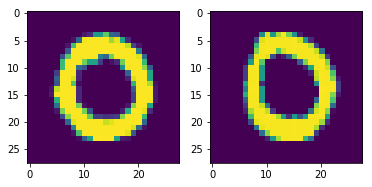

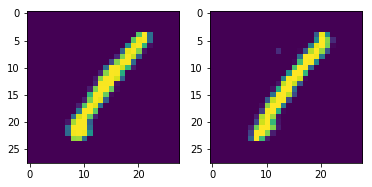

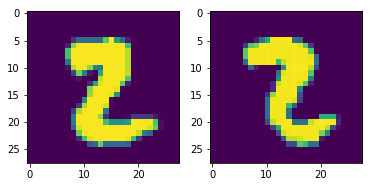

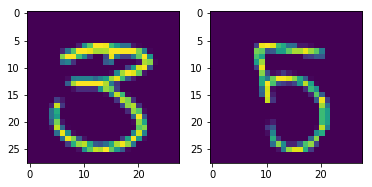

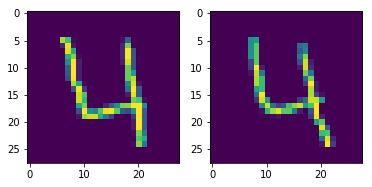

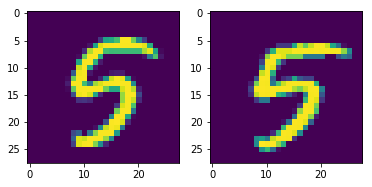

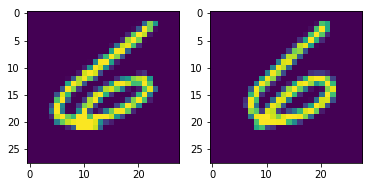

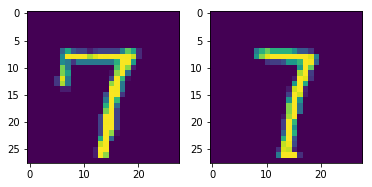

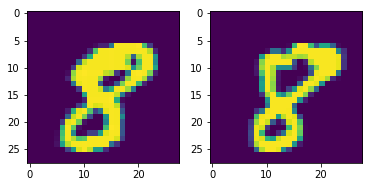

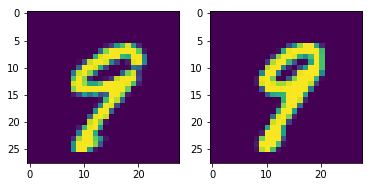

In [11]:
for i, p in enumerate(pair):
    fig, axs = plt.subplots(1,2)
    axs[0].imshow(X_train[digit_i[i]].reshape(28,28))
    axs[1].imshow(X_train[p].reshape(28,28))
    if (i != Y_train[p]):
        print("*Best match L2 is " + str(distance[i]) + " which is between " + str(i) + " and " + str(Y_train[p]))
    else:
        print("Best match L2 is " + str(distance[i]) + " which is between " + str(i) + " and " + str(Y_train[p]))

### Question 1 (e)

In [12]:
train_0 = X_train[Y_train == 0]
train_1 = X_train[Y_train == 1]

gen_0 = euclidean_distances(train_0, train_0).flatten()
gen_1 = euclidean_distances(train_1, train_1).flatten()
imp = euclidean_distances(train_0, train_1).flatten()
gen = np.append(gen_0, gen_1)

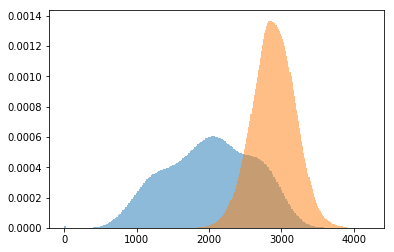

In [13]:
plt.hist(gen, bins=200, histtype='stepfilled', density=True,alpha=0.5)
plt.hist(imp[:len(imp)], bins=200, histtype='stepfilled', density=True,alpha=0.5)
plt.show()

### Question 1 (f)

Equal error rate is the rate where false positive equals to false negative, so it is where false positive equals to (1-true postitive),thus it is the dotted line intersected with the ROC curve, with is approximately 0.2. The equal error rate for a randomly guess would be 0.5 since 50% guesses will be right and 50% guesses will be right.

In [14]:
TPR = []
FPR = []

steps = int(np.min([np.max(gen), np.max(imp)])/100)
for i in range(steps):
    thr = 100 * i
    idx1 = np.where(gen <= thr)
    idx2 = np.where(gen >= thr)
    idx3 = np.where(imp <= thr)
    idx4 = np.where(imp >= thr)
    
    tpr = float(len(gen[idx1]))/(len(gen[idx1]) + len(gen[idx2]))
    TPR.append(tpr)
    fpr = float(len(imp[idx3]))/(len(imp[idx3]) + len(imp[idx4]))
    FPR.append(fpr)



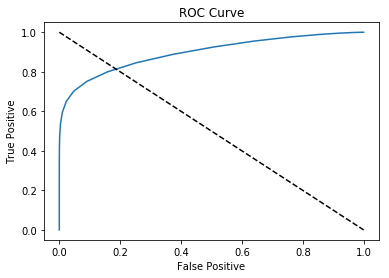

In [15]:
plt.plot(FPR, TPR)    
plt.xlabel("False Positive")
plt.plot([0, 1], [1, 0], 'k--')
plt.ylabel("True Positive")  
plt.title("ROC Curve")
plt.show()

### Question 1 (g)

In [17]:
def knn(train_x, train_y, test_x, k):
    pred = []    
    dist = euclidean_distances(test_x, train_x)
    for i in dist:        
        idx = np.argsort(i)[0:k]
        
        # get count
        count = {}
        for j in train_y[idx]:
            if j in count: 
                count[j] += 1
            else: 
                count[j] = 1
        result = sorted(count.items(), key=lambda t: t[1], reverse=True)
        pred.append(result[0][0])
    return pred

### Question 1 (h)

The best k we found is k = 4.

In [18]:
train_x, val_x, train_y, val_y = train_test_split(X_train, Y_train, test_size = 0.15, random_state=123)

In [19]:
def c_accuracy(label, prediction):
    acc = 0
    for i in range(len(label)):
        if label[i] == prediction[i]:
            acc += 1
    accuracy = acc / float(len(label)) * 100.0
    return accuracy

In [20]:
val_accs = []
k_range = range(1, 10)
for k in k_range:
    predict = knn(train_x, train_y, val_x, k)
    accu = c_accuracy(val_y, predict)
    print("when k = ",str(k),", validation set accuracy = ",str(accu))
    val_accs.append(accu)

when k =  1 , validation set accuracy =  96.77777777777777
when k =  2 , validation set accuracy =  96.77777777777777
when k =  3 , validation set accuracy =  97.01587301587301
when k =  4 , validation set accuracy =  97.07936507936508
when k =  5 , validation set accuracy =  96.85714285714285
when k =  6 , validation set accuracy =  97.01587301587301
when k =  7 , validation set accuracy =  96.84126984126983
when k =  8 , validation set accuracy =  96.88888888888889
when k =  9 , validation set accuracy =  96.68253968253968


In [21]:
train_accs = []
k_range = range(1, 10)
for k in k_range:
    predict = knn(train_x, train_y, train_x, k)
    accu = c_accuracy(train_y, predict)
    print("when k = ",str(k),", train set accuracy = ",str(accu))
    train_accs.append(accu)

when k =  1 , train set accuracy =  100.0
when k =  2 , train set accuracy =  100.0
when k =  3 , train set accuracy =  98.57703081232494
when k =  4 , train set accuracy =  98.75070028011204
when k =  5 , train set accuracy =  98.04761904761905
when k =  6 , train set accuracy =  98.19607843137254
when k =  7 , train set accuracy =  97.70028011204481
when k =  8 , train set accuracy =  97.80952380952381
when k =  9 , train set accuracy =  97.42857142857143


### Question 1 (i)

The most tricky digit is 8.

In [22]:
prediction = knn(train_x, train_y, val_x, 4)
confusion_m = confusion_matrix(val_y, prediction)
print("The Confusion matrix is ")
print(confusion_m)

The Confusion matrix is 
[[593   0   0   0   0   1   3   1   0   0]
 [  0 715   0   1   0   0   1   2   1   0]
 [  4   6 609   0   0   1   0   8   4   3]
 [  0   0   3 633   0   6   0   4   4   1]
 [  0   7   0   0 572   0   3   2   1   9]
 [  1   2   0   5   0 561   4   0   4   3]
 [  3   0   0   0   0   1 644   0   0   0]
 [  1   5   2   0   1   0   0 613   0   6]
 [  4   9   1   9   0  11   2   2 571   5]
 [  2   0   0   2  13   1   1   7   1 605]]


In [23]:
diag = []
for i in range(len(confusion_m)):
    diag.append(float(confusion_m[i][i]))
diag = np.array(diag)

tricky_label = np.argsort(diag / np.sum(confusion_m, axis=1))
print("The Most tricky digit is: ",str(tricky_label[0]))

The Most tricky digit is:  8


### Question 1 (j)

Results already submitted to Kaggle.

In [24]:
#Final Output
prediction = knn(X_train, Y_train, m_test, 4)

In [25]:
def results_to_csv(y_test):
    df = pd.DataFrame({'Label': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('submission.csv', index_label='ImageId')

In [26]:
results_to_csv(prediction)


In [27]:
prediction

[2,
 0,
 9,
 9,
 3,
 7,
 0,
 3,
 0,
 3,
 5,
 7,
 4,
 0,
 4,
 3,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 4,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 2,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 0,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 6,
 5,
 8,
 8,
 2,
 8,
 8,
 9,
 2,
 3,
 5,
 4,
 1,
 0,
 9,
 2,
 4,
 3,
 6,
 7,
 2,
 0,
 6,
 6,
 1,
 4,
 3,
 9,
 7,
 4,
 0,
 9,
 2,
 0,
 7,
 3,
 0,
 5,
 0,
 8,
 0,
 0,
 4,
 7,
 1,
 7,
 1,
 1,
 3,
 3,
 3,
 7,
 2,
 8,
 6,
 3,
 8,
 7,
 8,
 4,
 3,
 5,
 6,
 0,
 0,
 0,
 3,
 1,
 3,
 6,
 4,
 3,
 4,
 5,
 5,
 8,
 7,
 7,
 2,
 8,
 4,
 3,
 5,
 6,
 5,
 3,
 7,
 5,
 7,
 8,
 3,
 0,
 4,
 5,
 1,
 2,
 7,
 6,
 3,
 0,
 2,
 7,
 8,
 6,
 1,
 3,
 7,
 4,
 1,
 2,
 4,
 8,
 5,
 2,
 4,
 9,
 2,
 1,
 6,
 0,
 6,
 1,
 4,
 9,
 6,
 0,
 9,
 7,
 6,
 9,
 1,
 9,
 0,
 9,
 9,
 0,
 8,
 4,
 6,
 2,
 0,
 9,
 3,
 6,
 7,
 2,
 1,
 6,
 3,
 4,
 2,
 3,
 1,
 0,
 2,
 0,
 4,
 6,
 1,
 0,
 0,
 4,
 9,
 1,
 7,
 3,
 2,
 3,
 8,
 6,
 8,
 6,
 2,
 8,
 5,
 5,
 9,
 8,
 3,
 5,
